In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

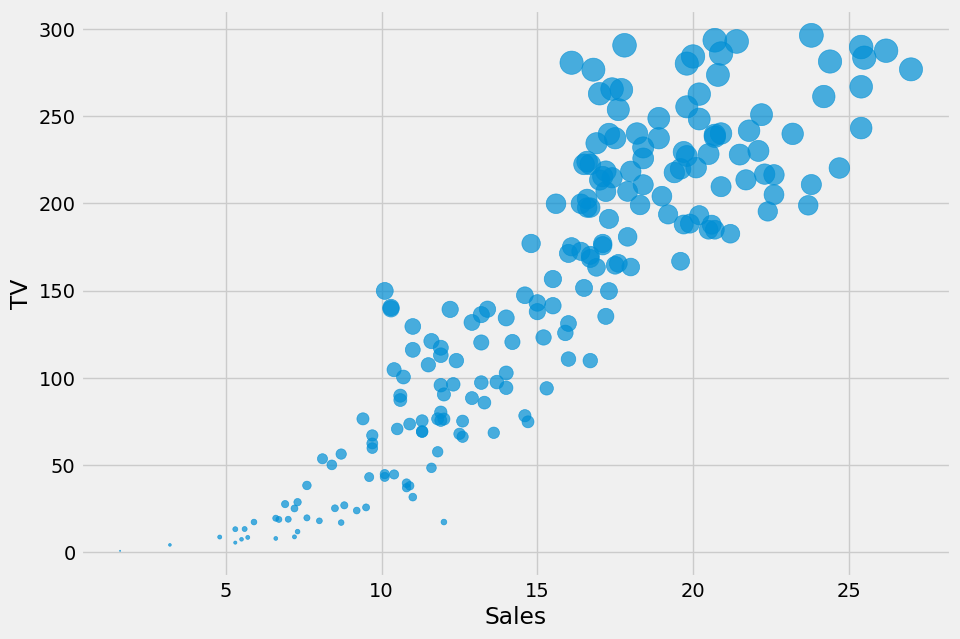

In [4]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

data.plot(kind='scatter', x='Sales', y='TV', 
          s='TV', grid=True, alpha=0.7, figsize=(10, 7))
plt.show()

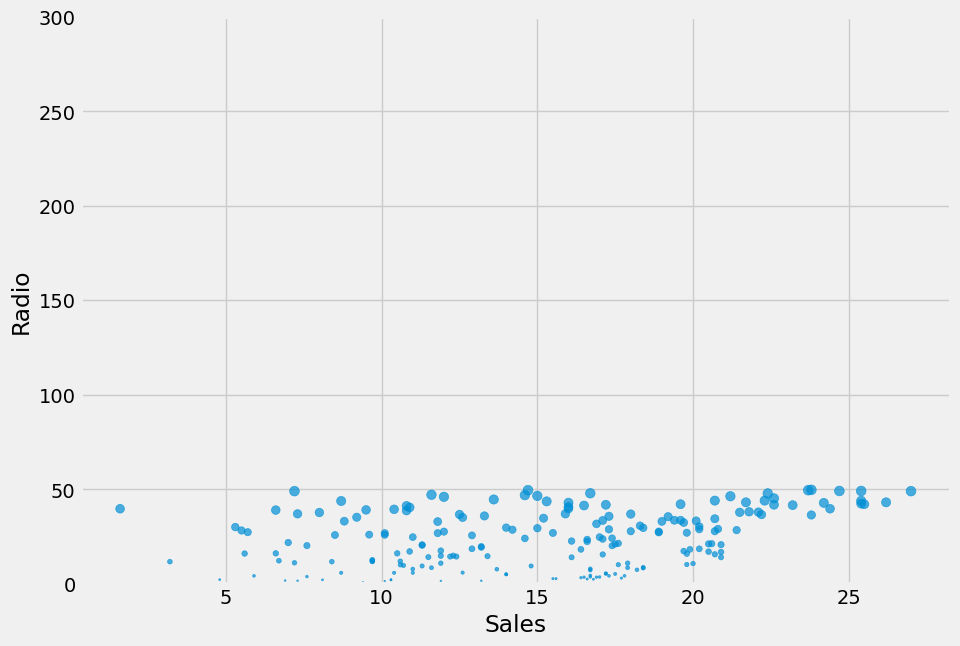

In [6]:
data.plot(kind='scatter', x='Sales', y='Radio', 
          s='Radio', grid=True, alpha=0.7,  figsize=(10, 7))
plt.ylim(0, 300)
plt.show()

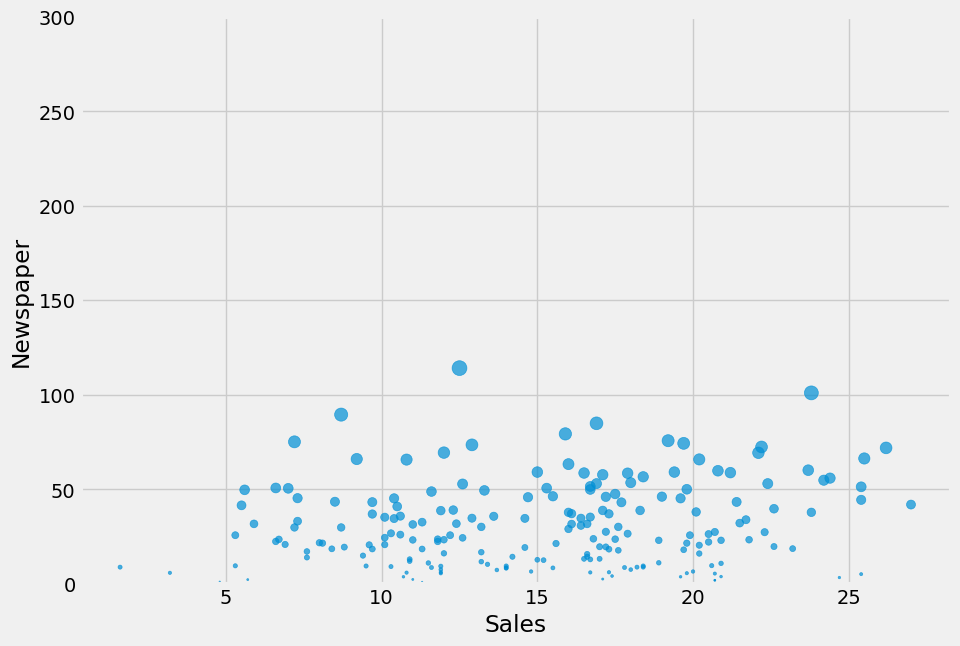

In [7]:
data.plot(kind='scatter', x='Sales', y='Newspaper', 
          s='Newspaper', grid=True, alpha=0.7,  figsize=(10, 7))
plt.ylim(0, 300)
plt.show()

In [7]:
correlation = data.corr()
correlation['Sales'].sort_values(ascending=False)

Sales        1.000000
TV           0.901208
Radio        0.349631
Newspaper    0.157960
Name: Sales, dtype: float64

In [8]:
x = np.array(data.drop(['Sales'], 1))
y = np.array(data['Sales'])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.2, 
                                                random_state=42)

/var/folders/1y/fh4hqfb94nl1ck9n1lv83b5m0000gn/T/ipykernel_35349/1445296615.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = np.array(data.drop(['Sales'], 1))


In [9]:
model = LinearRegression()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.9059011844150826

In [10]:
#features = [[TV, Radio, Newspaper]]
features = np.array([[171.5, 20.48, 50.71]])
model.predict(features)

array([16.34973873])